# Feature Engineering 1.0

As I started playing w/ logistic regression to build a Lada Gaga song detector, I found that the # of features is too large to compute.  Moreso, the feature grid was mostly sparse and mostly useless since it was based on a basic word count vectorization.  (See the nice example using Naive Bayes from Mike: https://github.com/qzmeng/ail/blob/master/training.ipynb)

There is some good scikit info on managing this:
http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py  

This is a survey of my findings

- Using 300 songs (1/2 Lady Gaga 1/2 Clash), we counted words
- 4000+ words


Text(0.5,0,u'File Analysis - words + in gaga songs vs - not in')

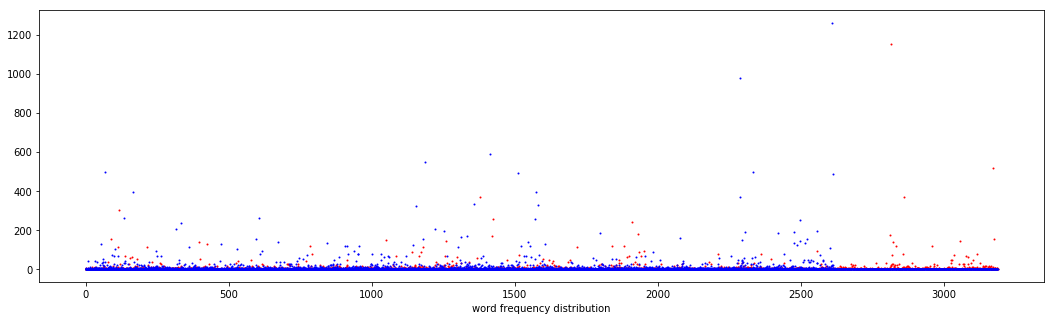

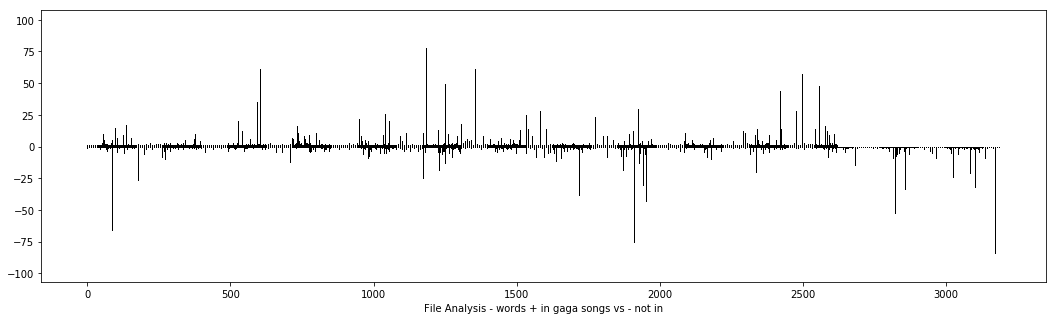

In [45]:
%matplotlib inline
import requests, pandas, io, numpy, argparse, math
from featureEngineering import *
import matplotlib.pyplot as plt, math
import pandas

trainingMatrix1,yArr1,labels1,fnames1 = getGagaData(gtype=0)
trainingMatrix2,yArr2,labels2,fnames2 = getGagaData(gtype=1)
m1,c1 = countWords2(trainingMatrix1,labels1,fnames1)
m2,c2 = countWords2(trainingMatrix2,labels2,fnames2)
m = mergeCounts(m1,m2)

fig = plt.figure(figsize=(18, 5))
x = m['i'].values.tolist()
y = m['gct'].values.tolist()
y2 = m['nct'].values.tolist()
plt.scatter(x,y,color='r', s=1)
plt.scatter(x,y2,color='b', s=1)
plt.xlabel('word frequency distribution')


fig = plt.figure(figsize=(18, 5))
x = m['i'].values.tolist()
y = m['gfct-delta'].values.tolist()
plt.bar(x,y,color='black')
plt.xlabel('File Analysis - words + in gaga songs vs - not in')

In [44]:
%%html
<style>table {margin-left: 0 !important;}</style>

Tons of words only used once, a few used many times, the rest are common words counted alot of times 

| Times Counted | Frequency | Meaning
|---------------|-----------|----
|1: | 1992   |  1992 words appeared once
|2: | 572
|3: | 296
|4: | 212    | 212 words appeared 4 times
|5: | 123   
|.. | ..
|25-600 | ~1  | Many diff words appeared a many times



Most frequent words are maybe useless conjugation:

| Word [Index] | count | Word [Index] | count |
|--------  |------  |----------- |----  |
|in  [1155]    |           ct: 321      | on  [1581]    |         ct:329       |
|love  [1356]     |          ct: 331     |    that  [2288]         |      ct:366       |
|oh  [1573]      |           ct: 394     |    be  [166]          |        ct:394       |
|your  [2612]    |           ct: 487     |     my  [1512]        |         ct:489      | 
|to  [2331]       |          ct: 495    |     and  [69]          |        ct:497     |  
|it  [1185]      |           ct: 550    |     me  [1414]       |          ct:589    |   
|the  [2289]     |           ct: 980   |      you  [2609]        |        ct:1260  |


Lots of words only used once:  

| Word [Index] | count | Word [Index] | count |
|--------  |------  |----------- |----  |
|typical  [2399]    |       ct: 1   |       six  [2046]           |    ct:1       |  
|hits  [1080]        |      ct: 1    |      photo  [1674]          |   ct:1       |  
|screaming  [1940]  |       ct: 1    |      atmosphere  [114]      |   ct:1      |   
|fit  [814]         |       ct: 1    |      rootiful  [1877]      |    ct:1       |  

Useful words maybe in middle of count frequency?

| Word [Index] | count | Word [Index] | count |
|--------  |------  |----------- |----  |
|superstar  [2215]    |     ct: 57      |   fame  [746]         |      ct:57        
|time  [2328]         |     ct: 58        | think  [2300]        |     ct:58        
|now  [1558]          |     ct: 59      |   tonight  [2341]      |     ct:60        
|gaga  [884]            |   ct: 61         |  heart  [1042]      |       ct:61  

One problem is we are counting total # of words.  I imagine in a song, the same words repeat alot so imagine if the chorus is "love love love... all you need is love love love" you are getting like 20 hits from one song.    
  
### Some more analysis using Pandas.DataFrame

I found its way easier to do stuff in DataFrames than with Numpy arrays.  
One thing I did is created this table:  [word, count, countFiles]
 - created matrix of word counts in + gaga files:  
 - created matrix of word counts in - gaga files:  
 - merged the tables (outer-join), and 0-filled Nulls (pandas.merge())
 - created 2 derived columns, calculating +/- of words more frequent/less frequent in gaga vs non-gaga files


In [2]:

trainingMatrix1,yArr1,labels1,fnames1 = getGagaData(gtype=0)
trainingMatrix2,yArr2,labels2,fnames2 = getGagaData(gtype=1)

m1,c1 = countWords2(trainingMatrix1, labels1, fnames1)
m2,c2 = countWords2(trainingMatrix2, labels2, fnames2)

m = mergeCounts(m1,m2)

m = m.sort_values('gct-delta')
print ('\ntop/bot # variance of # words *2nd to last column*')
m = m.sort_values('gct-delta')
display (pandas.concat([m.head(),m.tail()]))

print ('\ntop/bot # variance of # words (once per file) *last column*')
m = m.sort_values('gfct-delta')
display (pandas.concat([m.head(),m.tail()]))




top/bot # variance of # words *2nd to last column*


,i,word,gct,gfct,nct,nfct,gct-delta,gfct-delta
2814,2814,the,1154.0,97.0,0.0,0.0,-1154.0,-97.0
3172,3172,you,515.0,85.0,0.0,0.0,-515.0,-85.0
2862,2862,to,370.0,86.0,0.0,0.0,-370.0,-86.0
1380,1380,in,366.0,87.0,0.0,0.0,-366.0,-87.0
117,117,and,303.0,82.0,0.0,0.0,-303.0,-82.0
3258,69,and,0.0,0.0,497.0,86.0,497.0,86.0
4374,1185,it,0.0,0.0,550.0,78.0,550.0,78.0
4603,1414,me,0.0,0.0,589.0,82.0,589.0,82.0
5478,2289,the,0.0,0.0,980.0,98.0,980.0,98.0
5798,2609,you,0.0,0.0,1260.0,96.0,1260.0,96.0



top/bot # variance of # words (once per file) *last column*


,i,word,gct,gfct,nct,nfct,gct-delta,gfct-delta
2814,2814,the,1154.0,97.0,0.0,0.0,-1154.0,-97.0
1380,1380,in,366.0,87.0,0.0,0.0,-366.0,-87.0
2862,2862,to,370.0,86.0,0.0,0.0,-370.0,-86.0
3172,3172,you,515.0,85.0,0.0,0.0,-515.0,-85.0
117,117,and,303.0,82.0,0.0,0.0,-303.0,-82.0
4701,1512,my,0.0,0.0,489.0,84.0,489.0,84.0
3258,69,and,0.0,0.0,497.0,86.0,497.0,86.0
5520,2331,to,0.0,0.0,495.0,92.0,495.0,92.0
5798,2609,you,0.0,0.0,1260.0,96.0,1260.0,96.0
5478,2289,the,0.0,0.0,980.0,98.0,980.0,98.0


As mentioned before, the most frequent words aren not so great.   Taking the 2nd table may work...

------


## Or Just use Scikit-Learn API

Or I can just use scikit-learn's feature magic and see what they do.  Let me see...  http://scikit-learn.org/stable/modules/feature_selection.html

Using sckit <B>VarianceThreshold</B> - feature reduction magic 3189 -> 64 with a variance > 5.0 -- which means dist from mean ^2, or at least removing columns of all 0's, or 0's, 1's, 2's...


In [42]:
t1 = numpy.array(trainingMatrix1)

# VarianceThreadhold
print (t1.shape)
from sklearn.feature_selection import VarianceThreshold
model = VarianceThreshold(threshold=(5))
m = model.fit_transform(t1)
print ('Variance 5.0',m.shape)

picklist = model.get_support(True)
pickwords = [labels1[p] for p in picklist]
pickwords = numpy.array(pickwords).reshape(4,-1)
df = pandas.DataFrame(pickwords)
display(df)


(100, 2826)
('Variance 1.0', (100, 64))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,accidental,al,already,ammunition,aristocrat,babbling,benny,brave,broadway,by,chuck,confronted,crusader,cupboard,curse,didn
1,drummers,executive,fallen,fine,fingers,floating,fridge,from,gets,guilty,hates,hip,horse,inc,invoice,jerking
2,knee,livin,long,low,makes,mandolina,married,marx,meeting,panda,plastic,plenty,print,regulations,seem,shyboy
3,sickness,sign,silent,sinners,slogans,smarmy,sprays,stills,stranger,strangers,suck,suppose,syndrum,testify,that,them


-----

Scikit <B>SelectKBest</B> (top 50) same magic goes from 3189 features to top 50 !   How this works I dont know!


In [30]:
# SelectKBest(50)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
trainingMatrix1,yArr,labels,fnames = getGagaData(maxrows=100)
X, y = numpy.array(trainingMatrix1), yArr
print(X.shape)
model = SelectKBest(chi2, k=50)
X_new = model.fit_transform(X, y)   # need to keep labels
print('KBest',X_new.shape)

picklist = model.get_support(True)
pickwords = [labels[p] for p in picklist]
pickwords = numpy.array(pickwords).reshape(5,10)
df = pandas.DataFrame(pickwords)
display(df)


(100, 2826)
('KBest', (100, 50))


,0,1,2,3,4,5,6,7,8,9
0,and,baby,be,body,boy,cause,could,dance,do,don
1,doo,edge,fame,feel,fu,girl,give,good,guns,gypsy
2,heart,hey,it,just,know,let,ll,love,me,my
3,need,oh,on,retro,scheiße,shake,superstar,that,there,tonight
4,wah,wanna,want,what,wish,with,yeah,yo,you,your


## Note on Plotting

Decided to learn ploting.. i think w/ so many dimensions u have to plot, u just can't view 1000+ columns in a matrix and make any sense of it until we have VR more widespread
